In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import json

In [2]:
file_path = 'glass_x_sparse_cluster_50_clusters.json'
n_clusters = 50

# Read the data from the CSV file
# df_data = pd.read_csv("bandgap_features.csv")
df_data = pd.read_csv("glass_features.csv")


excluded = ["formula", "composition", "formula", "gfa"]
y = df_data['gfa'].values
X = df_data.drop(excluded, axis=1)

In [3]:
y.shape

(5680,)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Generate a random dataset
# np.random.seed(42)
# X = np.random.rand(100, 50)  # 100 samples with 50 features

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

(5680, 2)


In [5]:
X_tsne = pd.DataFrame(X_tsne, columns = ["X","Y"])
X_tsne = X_tsne.reset_index(drop=True)
print(X_tsne)

              X          Y
0    -45.126804 -59.266411
1    -65.447884  22.455786
2    -65.478371  22.638197
3    -65.502304  22.838694
4    -65.632652  23.345247
...         ...        ...
5675  63.700806  10.939623
5676  60.133232   9.457238
5677  60.176460   9.684000
5678  61.983253   9.554876
5679  60.439140   8.404195

[5680 rows x 2 columns]


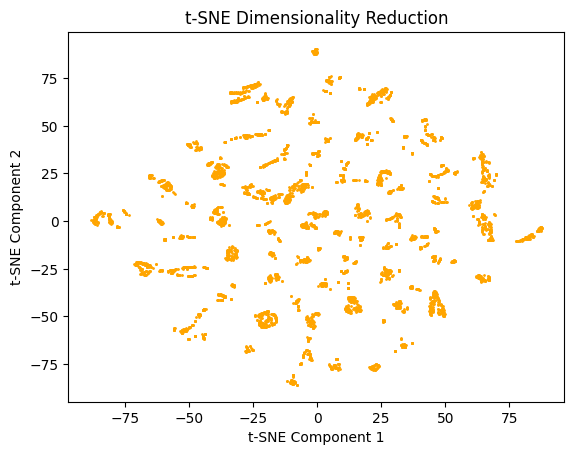

In [6]:
# Plot the reduced-dimensional data
plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], s=1, color="orange")
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Dimensionality Reduction')
plt.show()


/var/folders/_1/z9htdvys25dbgnl4nfxmvhf80000gn/T/ipykernel_18261/529003638.py:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(df.T)


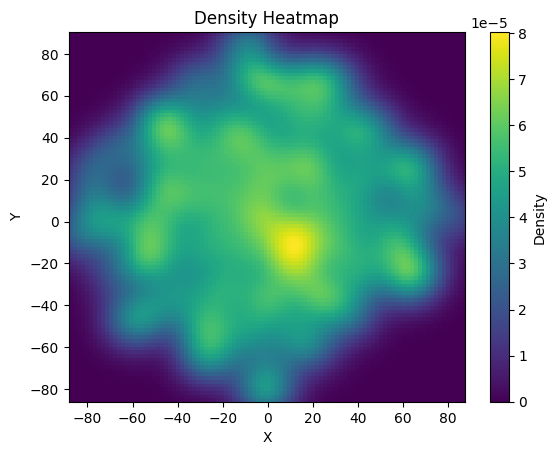

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde

# Generate some random data
# np.random.seed(42)
# x = np.random.normal(0, 1, 100)
# y = np.random.normal(0, 1, 100)

# Create DataFrame with the points
df = X_tsne

# Calculate the density using kernel density estimation
kde = kde.gaussian_kde(df.T)

# Define the grid for evaluation
x_grid, y_grid = np.mgrid[df['X'].min():df['X'].max():100j, df['Y'].min():df['Y'].max():100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])

# Evaluate the density on the grid
density = np.reshape(kde(positions).T, x_grid.shape)

# Plot the density heatmap
plt.imshow(density, origin='lower', aspect='auto', extent=[df['X'].min(), df['X'].max(), df['Y'].min(), df['Y'].max()])
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap')

# Show the plot
plt.show()


In [8]:
# Evaluate the density at each sample position
densities = kde(X_tsne.T)

density_dict = {}

# Print the density values for each sample position
for i in range(len(X_tsne)):
    density = densities[i]
    #print(f"Density at sample position {i+1}: {density}")
    
    density_dict[i] = density

#print(density_dict)

sorted_density = sorted(density_dict.items(), key=lambda x: x[1])
#print(sorted_density)
top500 = [x[0] for x in sorted_density[:500]]
X_sparse = X.iloc[top500]
print(X_sparse.shape)

(500, 133)


In [9]:
id_map = {}

for i, index in enumerate(top500):
    id_map[i] = top500[i]
    
id_map

{0: 1447,
 1: 1432,
 2: 1433,
 3: 1462,
 4: 1446,
 5: 1434,
 6: 1792,
 7: 1847,
 8: 1829,
 9: 1793,
 10: 1848,
 11: 1842,
 12: 1794,
 13: 1827,
 14: 1795,
 15: 1948,
 16: 1796,
 17: 1843,
 18: 1837,
 19: 1828,
 20: 1844,
 21: 1845,
 22: 1868,
 23: 1846,
 24: 1871,
 25: 1997,
 26: 1945,
 27: 1932,
 28: 1946,
 29: 2082,
 30: 1933,
 31: 1994,
 32: 1947,
 33: 1961,
 34: 2056,
 35: 2003,
 36: 1995,
 37: 1996,
 38: 2055,
 39: 2146,
 40: 2150,
 41: 2154,
 42: 2156,
 43: 2159,
 44: 2171,
 45: 2168,
 46: 2153,
 47: 2149,
 48: 2130,
 49: 2163,
 50: 2887,
 51: 2158,
 52: 2167,
 53: 5620,
 54: 5616,
 55: 2145,
 56: 4741,
 57: 4740,
 58: 4739,
 59: 5619,
 60: 4738,
 61: 4742,
 62: 5615,
 63: 2162,
 64: 2872,
 65: 2155,
 66: 2843,
 67: 5614,
 68: 2815,
 69: 2148,
 70: 5624,
 71: 2876,
 72: 5591,
 73: 2161,
 74: 2868,
 75: 2138,
 76: 2826,
 77: 2820,
 78: 2752,
 79: 5613,
 80: 2866,
 81: 2172,
 82: 5623,
 83: 2846,
 84: 3557,
 85: 5502,
 86: 2166,
 87: 2857,
 88: 3552,
 89: 3540,
 90: 3554,
 91: 2856

In [10]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=222)
kmeans.fit(X_sparse)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Print cluster labels and centers
#print("Cluster Labels:", labels)
#print("Cluster Centers:", centers)

# Create a dictionary to store the cluster assignments
cluster = {}
#print(labels)
for i, cluster_id in enumerate(labels):
    if cluster_id in cluster:
        #cluster[int(cluster_id)].append(i)
        continue
    else:
        cluster[int(cluster_id)] = [id_map[i]]







/Users/jason/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print(cluster)

{46: [1447], 30: [1433], 37: [1792], 21: [1794], 2: [1997], 24: [2146], 9: [2887], 28: [5620], 18: [4741], 39: [2826], 40: [5613], 44: [3557], 11: [4042], 27: [3501], 3: [3549], 36: [5592], 0: [5655], 23: [4013], 34: [5309], 1: [2142], 48: [2135], 19: [5127], 26: [5570], 5: [5216], 43: [5119], 32: [3956], 31: [5218], 10: [17], 15: [4919], 49: [1020], 22: [2822], 12: [802], 14: [5347], 4: [855], 45: [1016], 47: [5221], 17: [798], 41: [5553], 16: [2402], 7: [514], 20: [3890], 8: [5564], 6: [4526], 35: [5632], 13: [4087], 29: [4079], 25: [94], 33: [5357], 38: [4527], 42: [4298]}


In [12]:
selected_samples = []

# Print the size of each cluster
for key in sorted(cluster):
    #print(key, (cluster[key]))
    anchor_index = cluster[key][0]

    anchor_feature = X.iloc[anchor_index]
    #print(anchor_feature)
    distance_dict = {}
    for row_index in range(X.shape[0]):
        f = X.iloc[row_index]
        euclidean_distance = np.linalg.norm(anchor_feature - f)
        #print(euclidean_distance)
        
        if row_index == anchor_index:
            continue
        else:
            distance_dict[row_index] = euclidean_distance
    distance_dict = sorted(distance_dict.items(), key=lambda x: x[1])
    #print(distance_dict)
    n_added = 0
    for ck in distance_dict:
        if ck[0] not in selected_samples and n_added < 10:
            cluster[key].append(ck[0])
            selected_samples.append(ck[0])
            n_added += 1
    print(cluster[key])
    #break
for key in cluster:
    print(key, cluster[key])

[5655, 5645, 5644, 5650, 5646, 5657, 5568, 5647, 5628, 5651, 5652]
[2142, 2131, 2173, 2141, 2139, 2168, 2134, 2153, 2149, 2130, 2163]
[1997, 2082, 1948, 2056, 1994, 1945, 2003, 1946, 1932, 1843, 1995]
[3549, 3547, 3561, 3546, 3563, 3544, 3551, 3532, 3491, 3518, 3492]
[855, 853, 889, 851, 828, 832, 872, 880, 980, 968, 977]
[5216, 5215, 5214, 5240, 5119, 5121, 5217, 5118, 5301, 5305, 5306]
[4526, 4372, 4328, 4379, 4424, 4445, 4230, 4527, 4456, 4347, 4298]
[514, 517, 506, 502, 516, 513, 485, 525, 552, 548, 499]
[5564, 5580, 5478, 5509, 5357, 5632, 5263, 5508, 5241, 5261, 5222]
[2887, 2876, 2866, 2846, 2856, 2850, 2868, 2872, 2849, 2835, 2842]
[17, 16, 15, 36, 35, 7, 34, 6, 14, 33, 5]
[4042, 4044, 4045, 4048, 4049, 4052, 4054, 4058, 4050, 4026, 4028]
[802, 799, 801, 800, 720, 708, 697, 698, 616, 615, 786]
[4087, 4085, 4068, 3973, 3968, 3926, 3935, 3925, 3937, 3971, 3974]
[5347, 5313, 5315, 5316, 5338, 5337, 5339, 5332, 5221, 5340, 5336]
[4919, 4968, 4969, 4850, 4970, 4812, 5031, 5032, 5024

In [13]:
# Example: Print formulas in cluster 0
for index in cluster[0]:
    print(df_data.iloc[index]["formula"])
    
# Save the dictionary to a file in JSON format
with open(file_path, 'w') as file:
    json.dump(cluster, file)

ZrFe7B2
ZrFe15B4
ZrFe14B5
ZrFe40B9
ZrFe16B3
ZrFe8B
Zr8Fe75B17
ZrFe17B2
ZrCo7B2
ZrFe44B5
ZrFe45B4
